# <center><b>Instituto Federal de Educação, Ciência e Tecnologia</b></center>
#### <center><font color='green'>Câmpus Câmpinas</font></center>
####  <center></center>

<b><font color="red" size=5> Alunas: </font></b>
<h3><li>Amanda Rodrigues da Silva - CP3013634</li></h3>
<h3><li>Natalia Rodrigues da Silva - CP3013651</li></h3>

<b><font size=6 color='blue'>Introdução</font></b>

Este é um conjunto de dados dos Jogos Olímpicos que descreve medalhas e atletas para Tóquio 2020. Os dados foram criados a partir dos Jogos Olímpicos de Tóquio .

Mais de 2.400 medalhas e 11.000 atletas (com alguns dados pessoais: data e local de nascimento, altura, etc.) dos XXXII Jogos Olímpicos você pode encontrar aqui. Além disso, estão presentes treinadores e responsáveis ​​técnicos.

Dados:

medals_total.csv- conjunto de dados que contém todas as medalhas agrupadas por país.

medals.csv - conjunto de dados que inclui informações gerais sobre todos os atletas que ganharam uma medalha.

athletes.csv - conjunto de dados que inclui algumas informações pessoais de todos os atletas.

coaches.csv - o conjunto de dados que inclui algumas informações pessoais de todos os treinadores.

technical_officials - o conjunto de dados que inclui algumas informações pessoais de todos os funcionários técnicos.

Fonte: https://www.kaggle.com/piterfm/tokyo-2020-olympics

O relacionamento entre as tabelas se dá conforme imagem abaixo:

![](database.jpeg)

<b><font size=6 color='blue'>Conexão com a instância AWS e criação do database</font></b>

In [255]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install imdb-sqlite
#import sqlite3

In [3]:
x = {}
for dirname, _, filenames in os.walk('/home/amanda/Documentos/Trabalho1_TBD/DatabaseOlympic'):
    for filename in filenames:
        x[filename.split ('.')[0]+'_df'] = os.path.join(dirname, filename)

In [4]:
for i in x.keys():
    print(i)
    locals()[i] = pd.read_csv(x[i])
    locals()[i].columns = [w.replace('/', '_') for w in locals()[i].columns]
    locals()[i].columns = [w.replace(' ', '_') for w in locals()[i].columns]
    locals()[i].columns = [w.lower() for w in locals()[i].columns]

medals_total_df
coaches_df
technical_officials_df
athletes_df
medals_df


In [5]:
#db instance : databasetrabalho1
#username: natalia
#pass: 
#host: databasetrabalho1.ctwhhho2wipa.sa-east-1.rds.amazonaws.com
#port: 3306

In [443]:
db = pymysql.connect(host = 'databasetrabalho1.ctwhhho2wipa.sa-east-1.rds.amazonaws.com', user = 'natalia', password = 'xxxx')

In [444]:
cursor = db.cursor()

In [10]:
cursor

In [11]:
sql = '''drop database jogos'''
cursor.execute(sql)

5

In [12]:
sql = '''create database jogos'''
cursor.execute(sql)

1

In [445]:
sql = '''use jogos'''
cursor.execute(sql)

0

In [14]:
cursor.connection.commit()

In [15]:
for i in x.keys():
    j = i.replace("_df", "_columns")
    print(j)
    locals()[j] = list(locals()[i].columns)

medals_total_columns
coaches_columns
technical_officials_columns
athletes_columns
medals_columns


In [424]:
print(medals_total_columns)
print(coaches_columns)
print(technical_officials_columns)
print(athletes_columns)
print(medals_columns)

['rank', 'country_code', 'gold_medal', 'silver_medal', 'bronze_medal', 'total', 'country']
['name', 'short_name', 'gender', 'birth_date', 'country_code', 'discipline', 'function', 'event', 'url']
['name', 'short_name', 'gender', 'birth_date', 'country', 'discipline', 'function', 'url']
['name', 'short_name', 'gender', 'birth_date', 'birth_place', 'birth_country', 'country', 'country_code', 'discipline', 'discipline_code', 'residence_place', 'residence_country', 'height_m_ft', 'url']
['medal_type', 'medal_code', 'medal_date', 'athlete_short_name', 'athlete_name', 'athlete_sex', 'athlete_link', 'country_code', 'discipline_code', 'event', 'country', 'discipline']


<h3><b><font size=3 >Medals_total_df</font></b></h3>

In [17]:
print(medals_total_df.head(5))
print(medals_total_df.info())

   rank country_code  gold_medal  silver_medal  bronze_medal  total  \
0     1          USA          39            41            33    113   
1     2          CHN          38            32            18     88   
2     3          JPN          27            14            17     58   
3     4          GBR          22            21            22     65   
4     5          ROC          20            28            23     71   

                      country  
0    United States of America  
1  People's Republic of China  
2                       Japan  
3               Great Britain  
4                         ROC  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          93 non-null     int64 
 1   country_code  93 non-null     object
 2   gold_medal    93 non-null     int64 
 3   silver_medal  93 non-null     int64 
 4   bronze_medal  93 non-n

In [18]:
sql = '''CREATE TABLE medals_total_df (
    rank_country INT,
    country_code VARCHAR(10),
    gold_medal INT,
    silver_medal INT,
    bronze_medal INT,
    total INT,
    country VARCHAR(100))'''

In [19]:
sql
cursor.execute(sql)

0

In [20]:
cursor.connection.commit()

In [21]:
cursor.execute('''SELECT * FROM medals_total_df''')

0

In [22]:
for i,row in medals_total_df.iterrows():
    #here %S means string values 
    sql = "INSERT INTO jogos.medals_total_df VALUES (%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(row))

In [23]:
cursor.connection.commit()

In [24]:
cursor.execute('''SELECT * FROM medals_total_df''')

93

<h3><b><font size=3 >Coaches_df</font></b></h3>

In [25]:
print(coaches_df.info())
print(coaches_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          407 non-null    object
 1   short_name    407 non-null    object
 2   gender        407 non-null    object
 3   birth_date    407 non-null    object
 4   country_code  407 non-null    object
 5   discipline    407 non-null    object
 6   function      407 non-null    object
 7   event         281 non-null    object
 8   url           407 non-null    object
dtypes: object(9)
memory usage: 28.7+ KB
None
              name    short_name gender  birth_date country_code  discipline  \
0  ABDELMAGID Wael  ABDELMAGID W   Male  1982-08-02          EGY    Football   
1        ABE Junya         ABE J   Male  1990-07-25          JPN  Volleyball   
2    ABE Katsuhiko         ABE K   Male  1979-09-23          JPN  Basketball   
3     ADAMA Cherif       ADAMA C   Male  1962-05-06          CIV    

In [26]:
sql = '''CREATE TABLE coaches_df (
 name VARCHAR(100)
 ,short_name VARCHAR(100)
 ,gender VARCHAR(10)
 ,birth_date DATE
 ,country_code VARCHAR(10)
 ,discipline VARCHAR(100)
 ,function_name VARCHAR(50)
 ,event_name VARCHAR(10)
 ,url_link VARCHAR(100))'''

In [27]:
sql
cursor.execute(sql)

0

In [28]:
cursor.connection.commit()

In [29]:
coaches_df = coaches_df.where(pd.notnull(coaches_df), None)

In [30]:
for i,row in coaches_df.iterrows():
    #here %S means string values 
    sql = "INSERT INTO jogos.coaches_df VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(row))

In [31]:
cursor.execute('''SELECT * FROM coaches_df''')

407

<h3><b><font size=3 >Technical_officials_df</font></b></h3>

In [32]:
print(technical_officials_df.info())
print(technical_officials_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        956 non-null    object
 1   short_name  956 non-null    object
 2   gender      956 non-null    object
 3   birth_date  956 non-null    object
 4   country     956 non-null    object
 5   discipline  956 non-null    object
 6   function    956 non-null    object
 7   url         956 non-null    object
dtypes: object(8)
memory usage: 59.9+ KB
None
                         name     short_name  gender  birth_date     country  \
0                ABAEVA Elena       ABAEVA E  Female  1966-04-21  Uzbekistan   
1                ABBAR Bachir        ABBAR B    Male  1965-05-03     Morocco   
2         ABDELLATIF Makfouni   ABDELLATIF M    Male  1972-11-23     Morocco   
3                    ABE Miya          ABE M  Female  1992-10-27       Japan   
4  ACIGA FULA Antonio Stephen  ACIGA FULA AS    Ma

In [33]:
sql = '''CREATE TABLE technical_officials_df (
 name VARCHAR(100)
 ,short_name VARCHAR(100)
 ,gender VARCHAR(10)
 ,birth_date DATE
 ,country VARCHAR(10)
 ,discipline VARCHAR(100)
 ,function_name VARCHAR(50)
 ,url_link VARCHAR(100))'''

In [34]:
sql
cursor.execute(sql)

0

In [35]:
cursor.connection.commit()

In [36]:
cursor.execute('''SELECT * FROM technical_officials_df''')

0

In [37]:
for i,row in technical_officials_df.iterrows():
    #here %S means string values 
    sql = "INSERT INTO jogos.technical_officials_df VALUES (%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(row))

In [38]:
cursor.connection.commit()

In [88]:
cursor.execute('''SELECT * FROM technical_officials_df''')

956

<h3><b><font size=3 >Athletes_df</font></b></h3>

In [40]:
print(athletes_df.info())
print(athletes_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               11656 non-null  object
 1   short_name         11656 non-null  object
 2   gender             11497 non-null  object
 3   birth_date         11497 non-null  object
 4   birth_place        7608 non-null   object
 5   birth_country      8320 non-null   object
 6   country            11656 non-null  object
 7   country_code       11656 non-null  object
 8   discipline         11497 non-null  object
 9   discipline_code    11656 non-null  object
 10  residence_place    7249 non-null   object
 11  residence_country  6545 non-null   object
 12  height_m_ft        4655 non-null   object
 13  url                11656 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB
None
                name  short_name  gender  birth_date birth_place  \
0    AALERUD Katrine   AA

In [41]:
athletes_df = athletes_df.where(pd.notnull(athletes_df), None)

In [42]:
x = athletes_df['height_m_ft'].str.split('/',expand=True)
x.replace(np.nan, None)
athletes_df[['height_m','height_ft']] = x

In [43]:
athletes_df

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m_ft,url,height_m,height_ft
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,None,None,None,../../../en/results/cycling-road/athlete-profi...,None,None
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...,1.65,5'4''
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...,1.98,6'5''
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,None,None,2.00/6'6'',../../../en/results/basketball/athlete-profile...,2.00,6'6''
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,None,None,1.92/6'3'',../../../en/results/basketball/athlete-profile...,1.92,6'3''
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11651,ZWICKER Martin Detlef,ZWICKER MD,Male,1987-02-27,KOTHEN,Germany,Germany,GER,Hockey,HOC,None,None,1.76/5'9'',../../../en/results/hockey/athlete-profile-n13...,1.76,5'9''
11652,ZWOLINSKA Klaudia,ZWOLINSKA K,Female,1998-12-18,None,None,Poland,POL,Canoe Slalom,CSL,NOWY SACZ,Poland,None,../../../en/results/canoe-slalom/athlete-profi...,None,None
11653,ZYKOVA Yulia,ZYKOVA Y,Female,1995-11-25,KRASNOYARSK,Russian Federation,ROC,ROC,Shooting,SHO,KRASNOYARSK,Russian Federation,None,../../../en/results/shooting/athlete-profile-n...,None,None
11654,ZYUZINA Ekaterina,ZYUZINA E,Female,1996-12-08,LIPETSK,Russian Federation,ROC,ROC,Sailing,SAL,LIPETSK,Russian Federation,None,../../../en/results/sailing/athlete-profile-n1...,None,None


In [44]:
sql = '''CREATE TABLE athletes_df (
 name VARCHAR(100)
 ,short_name VARCHAR(100)
 ,gender VARCHAR(10)
 ,birth_date DATE
 ,birth_place VARCHAR(100)
 ,birth_country VARCHAR(100)
 ,country VARCHAR(100)
 ,country_code VARCHAR(10)
 ,discipline VARCHAR(100)
 ,discipline_code VARCHAR(100)
 ,residence_place VARCHAR(100)
 ,residence_country VARCHAR(100)
 ,height_m_ft VARCHAR(100)
 ,url_link VARCHAR(100)
 ,height_m DECIMAL(3,2)
 ,height_ft VARCHAR(10))'''

In [45]:
sql
cursor.execute(sql)

0

In [46]:
cursor.execute('''SELECT * FROM athletes_df''')

0

In [47]:
cursor.connection.commit()

In [48]:
for i,row in athletes_df.iterrows():
    #here %S means string values 
    sql = "INSERT INTO jogos.athletes_df VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(row))

In [49]:
cursor.connection.commit()

In [50]:
cursor.execute('''SELECT * FROM athletes_df''')

11656

<h3><b><font size=3 >Medals_df</font></b></h3>

In [51]:
print(medals_df.info())
print(medals_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   medal_type          2401 non-null   object
 1   medal_code          2401 non-null   int64 
 2   medal_date          2401 non-null   object
 3   athlete_short_name  2401 non-null   object
 4   athlete_name        2401 non-null   object
 5   athlete_sex         2401 non-null   object
 6   athlete_link        2401 non-null   object
 7   country_code        2401 non-null   object
 8   discipline_code     2401 non-null   object
 9   event               2401 non-null   object
 10  country             2401 non-null   object
 11  discipline          2401 non-null   object
dtypes: int64(1), object(11)
memory usage: 225.2+ KB
None
     medal_type  medal_code             medal_date athlete_short_name  \
0    Gold Medal           1  2021-07-24 00:00:00.0             KIM JD   
1    Gold Medal  

In [52]:
sql = '''CREATE TABLE medals_df (
  medal_type VARCHAR(100)
 ,medal_code INT 
 ,medal_date DATE
 ,athlete_short_name VARCHAR(100)
 ,athlete_name VARCHAR(100)
 ,athlete_sex VARCHAR(100)
 ,athlete_link VARCHAR(100)
 ,country_code VARCHAR(10)
 ,discipline_code VARCHAR(10)
 ,event_name VARCHAR(100)
 ,country VARCHAR(100)
 ,discipline VARCHAR(100))'''

In [53]:
sql
cursor.execute(sql)

0

In [54]:
cursor.connection.commit()

In [55]:
for i,row in medals_df.iterrows():
    #here %S means string values 
    sql = "INSERT INTO jogos.medals_df VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(row))

In [56]:
cursor.connection.commit()

In [57]:
cursor.execute('''SELECT * FROM medals_df''')

2401

<b><font size=6 color='blue'>Consultas</font></b>

<b><font size=5> 1. Qual país tem o atleta mais velho? E o mais novo? </font></b>

In [432]:
sql = '''SELECT 1.0*datediff('2021-08-05', birth_date)/365 idade_em_anos, name, country, birth_date
        FROM athletes_df
        order by 1 desc
        limit 1'''
df1 = pd.read_sql(sql, db)
print(df1)
print(f'\n')

   idade_em_anos        name    country  birth_date
0       66.72329  HANNA Mary  Australia  1954-12-01




In [433]:
sql = '''SELECT 1.0*datediff('2021-08-05', birth_date)/365 idade_em_anos, name, country, birth_date
        FROM athletes_df
        where birth_date is not null
        order by 1 asc
        limit 1'''
df2 = pd.read_sql(sql, db)
print(df2)
print(f'\n')

   idade_em_anos       name               country  birth_date
0           12.6  ZAZA Hend  Syrian Arab Republic  2009-01-01




In [441]:
print(f"O atleta mais velho é da {df1['country'][0]} e o mais novo é da {df2['country'][0]}")

O atleta mais velho é da Australia e o mais novo é da Syrian Arab Republic


<b><font size=5>2. Quais foram os 10 atletas que mais ganharam medalhas? Quantos ganharam mais de uma?</font></b>

In [447]:
sql = '''SELECT athlete_name, athlete_short_name, country, country_code, count(*) qtde
        FROM medals_df
        group by athlete_name, athlete_short_name, country, country_code
        order by count(*) desc
        limit 10'''
df3 = pd.read_sql(sql, db)
df3

,athlete_name,athlete_short_name,country,country_code,qtde
0,McKEON Emma,McKEON E,Australia,AUS,7
1,DRESSEL Caeleb,DRESSEL C,United States of America,USA,5
2,LEDECKY Kathleen,LEDECKY K,United States of America,USA,4
3,TITMUS Ariarne,TITMUS A,Australia,AUS,4
4,SCOTT Duncan,SCOTT D,Great Britain,GBR,4
5,McKEOWN Kaylee,McKEOWN K,Australia,AUS,4
6,ZHANG Yufei,ZHANG Y,People's Republic of China,CHN,4
7,XIAO Ruoteng,XIAO R,People's Republic of China,CHN,3
8,HASHIMOTO Daiki,HASHIMOTO D,Japan,JPN,3
9,NAGORNYY Nikita,NAGORNYY N,ROC,ROC,3


In [449]:
print(f"A atleta que mais ganhou medalhas foi {df3['athlete_name'][0]} da {df3['country'][0]}, conquistando {df3['qtde'][0]} prêmios.")

A atleta que mais ganhou medalhas foi McKEON Emma da Australia, conquistando 7 prêmios.


In [457]:
sql = '''SELECT count(*) qtde
        FROM(SELECT athlete_name, athlete_short_name, country, country_code, count(*) qtde
        FROM medals_df
        group by athlete_name, athlete_short_name, country, country_code
        having count(*) > 1
        order by count(*) desc) a
        '''
df4 = pd.read_sql(sql, db)
print(df4)
print(f"\n\n {df4['qtde'][0]} atletas ganharam mais de uma medalha")

   qtde
0   182


 182 atletas ganharam mais de uma medalha


<b><font size=5>3. Qual a distribuição das alturas dos jogadores de basquete dos países que ganharam medalhas?? </font></b>

In [460]:
#Vamos primeiro verificar se temos alturas nulas para esses atletas

sql = '''SELECT mdf.country, mdf.country_code, medal_code, gender, height_m
        FROM medals_df mdf 
        inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        where mdf.discipline = 'Basketball'
          and height_m is null
        order by gender, medal_code'''
df = pd.read_sql(sql, db, index_col='country_code')

#Não temos alturas nulas

In [461]:
#altura dos jogadores de basquete dos países que ganharam medalhas

sql = '''SELECT mdf.country, mdf.country_code, medal_code, gender, count(*) as qtde_atletas, avg(height_m) as altura_media, max(height_m) altura_max, min(height_m) altura_min
        FROM medals_df mdf 
        inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        where mdf.discipline = 'Basketball'
        group by mdf.country, mdf.country_code, medal_code, gender
        order by gender, medal_code'''
df = pd.read_sql(sql, db, index_col='country_code')
df

,country,medal_code,gender,qtde_atletas,altura_media,altura_max,altura_min
country_code,,,,,,,
USA,United States of America,1,Female,12,1.838333,2.03,1.55
JPN,Japan,2,Female,12,1.755833,1.85,1.62
FRA,France,3,Female,12,1.846667,1.97,1.68
USA,United States of America,1,Male,12,1.996667,2.13,1.91
FRA,France,2,Male,12,2.016667,2.18,1.78
AUS,Australia,3,Male,12,1.985000,2.11,1.83


In [462]:
#Quartis das alturas dos jogadores de basquete que ganharam medalhas

sql = '''SELECT concat(mdf.medal_code, ' . ', mdf.country, ' - ', gender) team, height_m, ntile(4) over (partition by concat(mdf.medal_code, ' . ',mdf.country, ' - ', gender) order by height_m) part_aux
        FROM medals_df mdf 
        inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        where mdf.discipline = 'Basketball'
        order by concat(mdf.medal_code, ' . ',mdf.country, ' - ', gender), height_m'''
df = pd.read_sql(sql, db)

sql2 = '''SELECT team, part_aux-1 quartil, min(height_m) valor
        from(SELECT concat(mdf.medal_code, ' . ', mdf.country, ' - ', gender) team, height_m, ntile(4) over (partition by concat(mdf.medal_code, ' . ',mdf.country, ' - ', gender) order by height_m) part_aux
        FROM medals_df mdf 
        inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        where mdf.discipline = 'Basketball') a
        where part_aux <> 1
        group by team, part_aux
        '''

df2 = pd.read_sql(sql2, db)
df2 

,team,quartil,valor
0,1 . United States of America - Female,1,1.75
1,1 . United States of America - Female,2,1.86
2,1 . United States of America - Female,3,1.93
3,1 . United States of America - Male,1,1.96
4,1 . United States of America - Male,2,2.00
5,1 . United States of America - Male,3,2.05
6,2 . France - Male,1,1.98
7,2 . France - Male,2,2.03
8,2 . France - Male,3,2.13
9,2 . Japan - Female,1,1.67


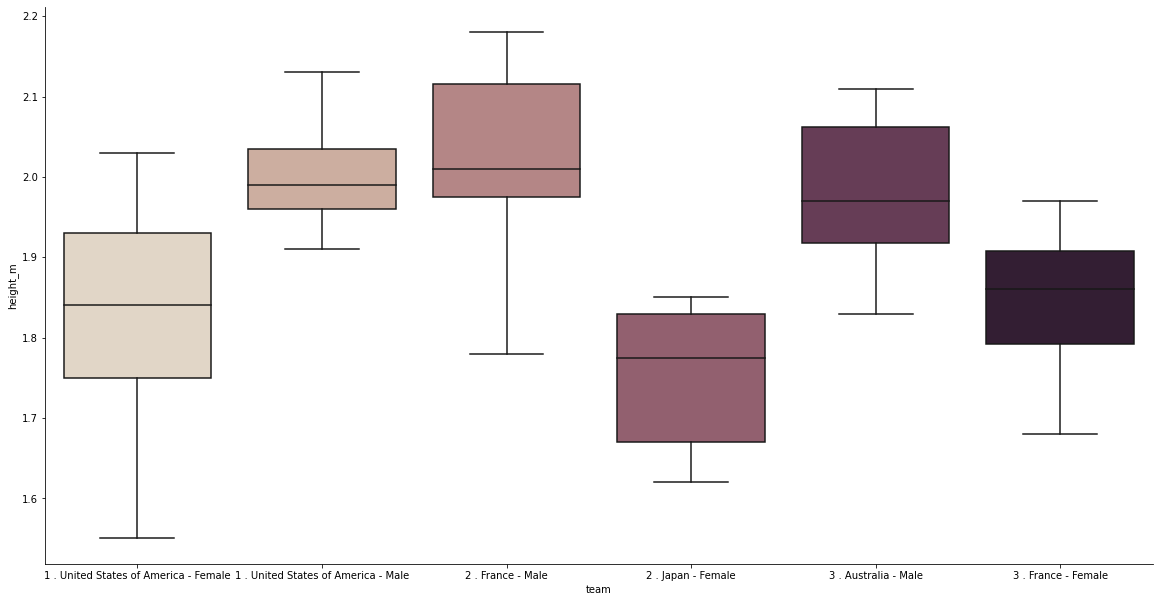

In [463]:
a = sns.catplot(x='team', y='height_m',kind="box", palette="ch:.25", data = df, height=8.27, aspect=16/8.27)

<b><font size=5>4. Qual a idade média dos atletas dos 10 paíeses que mais ganharam medalhas? E qual a idade média apenas dos atletas que ganharam medalhas desses mesmos países?</font></b>

In [63]:
sql = '''SELECT mtdf.country_code, avg(1.0*datediff('2021-08-05', birth_date)/365) idade_media, count(distinct name) qtde_atletas
        FROM medals_total_df mtdf 
        inner join athletes_df adf on mtdf.country_code = adf.country_code
        group by mtdf.country_code
        order by rank_country
        limit 10'''
df = pd.read_sql(sql, db, index_col='country_code')
df

,idade_media,qtde_atletas
country_code,,
USA,27.777585,633
CHN,26.095097,418
JPN,26.982766,613
GBR,27.482969,392
ROC,27.192120,341
AUS,27.451834,489
NED,28.339972,283
FRA,27.857005,396
GER,27.827735,415


In [64]:
sql = '''SELECT mtdf.country_code, avg(1.0*datediff('2021-08-05', birth_date)/365) idade_media, count(distinct athlete_name) qtde_atletas
        FROM medals_total_df mtdf 
        inner join medals_df mdf on mtdf.country_code = mdf.country_code
        inner join athletes_df adf on mtdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        group by mtdf.country_code
        order by rank_country
        limit 10'''
df = pd.read_sql(sql, db, index_col='country_code')
df

,idade_media,qtde_atletas
country_code,,
USA,27.017934,257
CHN,26.165049,114
JPN,26.402908,114
GBR,27.396207,112
ROC,26.914807,128
AUS,26.889872,99
NED,28.425020,62
FRA,28.815485,130
GER,29.201027,71


<b><font size=5>5. Qual o atleta mais velho e o mais novo a ganhar uma medalha?</font></b>

In [464]:
sql = '''SELECT adf.name, adf.short_name, mdf.country_code, mdf.discipline, 1.0*datediff(medal_date, birth_date)/365 idade
        FROM medals_df mdf 
        inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        where medal_date is not null
          and birth_date is not null
        order by 1.0*datediff(medal_date, birth_date)/365 desc
        limit 1'''
df5 = pd.read_sql(sql, db, index_col='country_code')
df5

,name,short_name,discipline,idade
country_code,,,,
AUS,HOY Andrew,HOY A,Equestrian,62.52329


In [465]:
sql = '''SELECT adf.name, adf.short_name, mdf.country_code, mdf.discipline, 1.0*datediff(medal_date, birth_date)/365 idade
        FROM medals_df mdf 
        inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
        where medal_date is not null
          and birth_date is not null
        order by 1.0*datediff(medal_date, birth_date)/365 asc
        limit 1'''
df6 = pd.read_sql(sql, db, index_col='country_code')
df6

,name,short_name,discipline,idade
country_code,,,,
JPN,HIRAKI Kokona,HIRAKI K,Skateboarding,12.94795


In [467]:
print(f"O atleta mais velho a ganhar medalhas foi o {df5['name'][0]} com {df5['idade'][0]} anos, enquanto o mais novo foi o {df6['name'][0]} com {df6['idade'][0]} anos")

O atleta mais velho a ganhar medalhas foi o HOY Andrew com 62.52329 anos, enquanto o mais novo foi o HIRAKI Kokona com 12.94795 anos


<b><font size=5>6. Quais modalidades possuem mais categorias distintas? E quis são disputada por atletas de mais paises diferentes?</font></b>

In [468]:
sql = '''SELECT discipline
        ,count(distinct event_name) qtde_cat
        FROM medals_df mdf
        group by discipline
        order by count(distinct event_name) desc
        limit 10'''
df = pd.read_sql(sql, db, index_col='discipline')
df = df.reset_index()
df

,discipline,qtde_cat
0,Athletics,48
1,Swimming,35
2,Wrestling,18
3,Shooting,15
4,Judo,15
5,Artistic Gymnastics,14
6,Weightlifting,14
7,Rowing,14
8,Boxing,13
9,Cycling Track,12


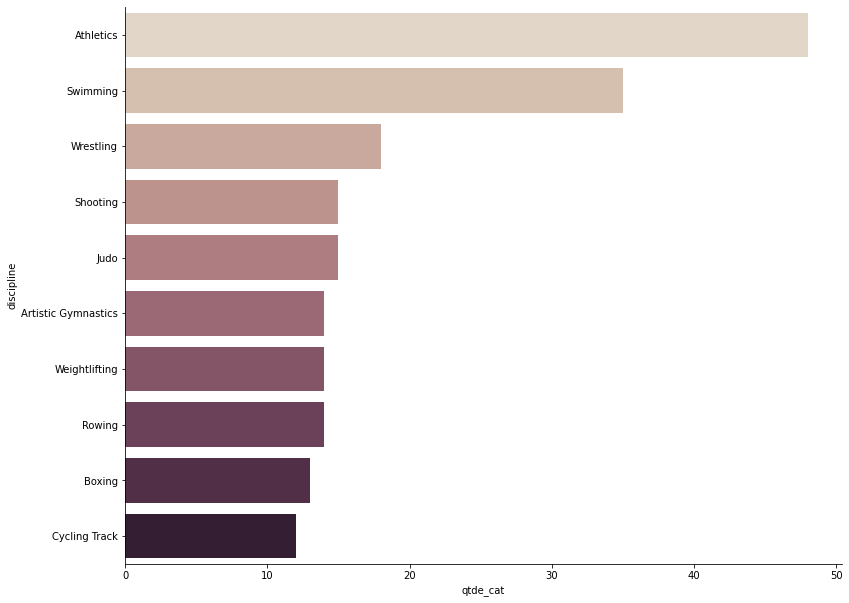

In [196]:
sns.catplot(y='discipline', x='qtde_cat', kind="bar", palette="ch:.25", data = df, height=8.27, aspect=11.7/8.27)

In [197]:
sql = '''SELECT adf.discipline
        ,count(distinct adf.country_code) qtde_paises
        FROM athletes_df adf 
        group by adf.discipline
        order by count(distinct adf.country_code) desc
        limit 10'''
df = pd.read_sql(sql, db, index_col='discipline')
df = df.reset_index()
df

,discipline,qtde_paises
0,Athletics,197
1,Swimming,182
2,Judo,128
3,Shooting,100
4,Boxing,81
5,Rowing,79
6,Weightlifting,77
7,Cycling Road,66
8,Sailing,65
9,Wrestling,61


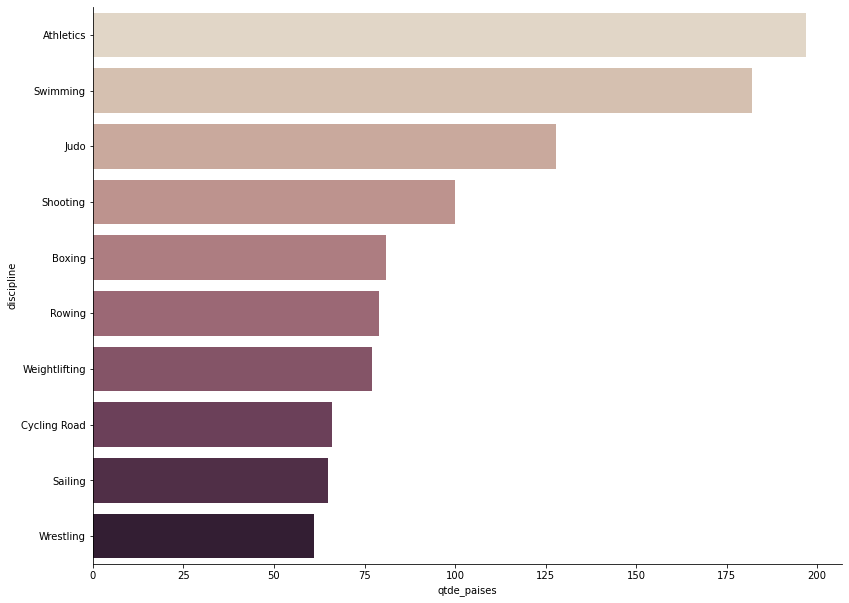

In [198]:
sns.catplot(y='discipline', x='qtde_paises', kind="bar", palette="ch:.25", data = df, height=8.27, aspect=11.7/8.27)

<b><font size=5>7. Qual a porcentagem de equipes femininas que são comandadas por homens? E de equipes masculinas comandadas por mulheres?</font></b>

In [488]:
sql = '''select genero_equipe, 1.0*sum(genero_diff)/count(*) porcent_dif, 1- 1.0*sum(genero_diff)/count(*) porcent_igual
        from(select codf.country_code, codf.discipline, codf.event_name, adf.gender genero_equipe, case when adf.gender = codf.gender then 0 else 1 end genero_diff
                from coaches_df codf 
                inner join medals_df mdf on mdf.country_code = codf.country_code and codf.discipline = mdf.discipline
                inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
                where adf.gender is not null
                  and codf.gender is not null ) as a
        group by genero_equipe
        order by genero_equipe'''
df = pd.read_sql(sql, db, index_col='genero_equipe')
df2 = df.T
df2

genero_equipe,Female,Male
porcent_dif,0.71196,0.19833
porcent_igual,0.28804,0.80167


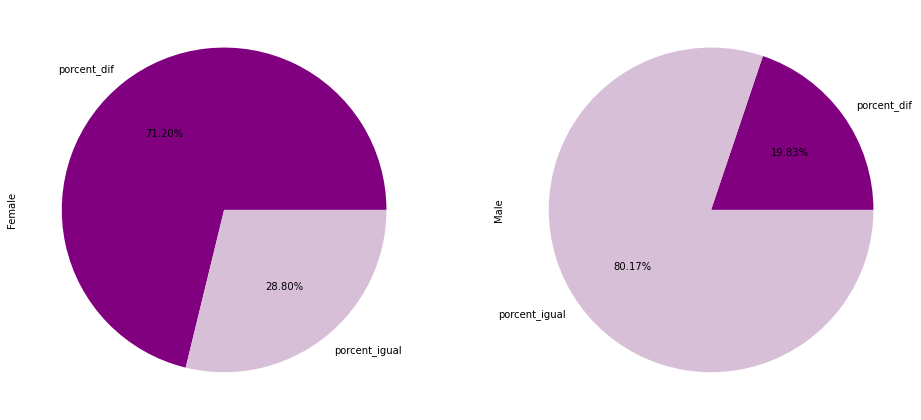

In [489]:
ax = df2.plot.pie(subplots=True, figsize=(16, 8), legend=None, autopct='%.2f%%',  colors = ['purple', 'thistle'] )


Enquanto 71% das equipes femininas são comandadas por homens, apenas 19% das equipes masculinas são comandadas por mulheres.

<b><font size=5>8. Qual o tamanho da delegação brasileira considerando atletas, técnicos e equipes técnicas?</font></b>

In [507]:
sql = '''select count(*) qtde
        from(
            select distinct name, short_name, discipline
            from(
                select name, short_name, discipline
                from coaches_df cdf
                where country_code = 'BRA'
                union all
                select name, short_name, discipline
                from athletes_df cdf
                where country_code = 'BRA'
                union all
                select name, short_name, discipline
                from technical_officials_df
                where country = 'BRAZIL'
            ) a
        ) b
        '''
df7 = pd.read_sql(sql, db)
print(df7)

print(f"\n\n A delegação brasileira possui {df7['qtde'][0]} integrantes ")


   qtde
0   341


 A delegação brasileira possui 341 integrantes 


<b><font size=5>9. Qual país que possui a maior equipe técnica no voleibol? Quais países ganharam medalha nesse esporte?</font></b>

In [307]:
sql = '''select todf.country, todf.discipline
         ,count(distinct(concat(todf.name, todf.short_name, todf.discipline, todf.country))) tam_equipe
         from technical_officials_df todf
         where todf.discipline = 'Volleyball'
         group by country, discipline
         order by 3 desc
         limit 20
        '''
df = pd.read_sql(sql, db, index_col='country')
df

,discipline,tam_equipe
country,,
Japan,Volleyball,74
Serbia,Volleyball,3
Italy,Volleyball,3
Brazil,Volleyball,2
Argentina,Volleyball,2
Slovakia,Volleyball,2
France,Volleyball,2
Russian Fe,Volleyball,2
United Sta,Volleyball,1


In [384]:
sql = '''select distinct concat(medal_code, '.', mdf.country) country, athlete_sex, mdf.discipline
         from medals_df mdf
         inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
         where mdf.discipline = 'Volleyball'
         order by concat(medal_code, '.', mdf.country), athlete_sex, discipline desc
         limit 20
        '''
df = pd.read_sql(sql, db)
df

,country,athlete_sex,discipline
0,1.France,M,Volleyball
1,1.United States of America,W,Volleyball
2,2.Brazil,W,Volleyball
3,2.ROC,M,Volleyball
4,3.Argentina,M,Volleyball
5,3.Serbia,W,Volleyball


<b><font size=5>10. Quantos atletas ganharam medalhas disputando os jogos por países diferentes do de nascimento?</font></b>

In [408]:
sql = '''select medal_code
        ,gender
        ,count(*) qtde_por_medalha
        ,sum(count(*)) over(partition by gender) qtde_total
         from medals_df mdf
         inner join athletes_df adf on mdf.country_code = adf.country_code and mdf.athlete_name = adf.name
         where birth_country <> adf.country
           and birth_country is not null
           and adf.country is not null
        group by medal_code, gender
        order by gender, medal_code
        '''
df = pd.read_sql(sql, db)
df

,medal_code,gender,qtde_por_medalha,qtde_total
0,1,Female,39,115.0
1,2,Female,46,115.0
2,3,Female,30,115.0
3,1,Male,24,120.0
4,2,Male,59,120.0
5,3,Male,37,120.0
